In [2]:
import sqlite3
conn = sqlite3.connect('BabyDaybook.db')

In [5]:
c = conn.cursor()
for row in c.execute("SELECT name, gender, birthday FROM babies"):
    print(row)


('Arthur ', 'boy', 1431471600000)
('Evelyn', 'girl', 1505343600000)


In [6]:
import sqlalchemy

In [8]:
from sqlalchemy import create_engine, Column, Integer, String 
from sqlalchemy.ext.declarative import declarative_base

In [10]:
Base = declarative_base()

class Baby(Base):
    
    __tablename__ = 'babies'
    
    id = Column(Integer, primary_key=True)
    name = Column(String)
    gender = Column(String)
    birthday = Column(Integer)

In [16]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

Base = automap_base()

engine = create_engine('sqlite:///BabyDaybook.db')

Base.prepare(engine, reflect=True)

Baby = Base.classes.babies
Action = Base.classes.daily_actions

print(dir(Baby))



['__abstract__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__mapper__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__table__', '__weakref__', '_decl_class_registry', '_id', '_sa_class_manager', '_sa_decl_prepare', 'birthday', 'classes', 'convert_units', 'da_types_config', 'expected_birthday', 'gender', 'is_premature', 'metadata', 'name', 'photo_base64', 'prepare', 'svt', 'ui_color', 'uid', 'user_uid']


In [18]:
session = Session(engine)

for baby in session.query(Baby):
    print(baby.name, baby.gender, baby.uid)

Arthur  boy 64f39806449c5572f1d629013f42a387
Evelyn girl 84d28e0ac7cd6d557f33ad72c5a8f6c1


In [22]:
from datetime import datetime

for action in session.query(Action).filter(Action.baby_uid=='64f39806449c5572f1d629013f42a387'):
    print(datetime.fromtimestamp(action.start_millis//1000))

2015-05-15 21:11:00
2015-05-28 12:32:34
2015-05-20 13:00:00
2015-05-16 23:25:24
2015-05-20 17:40:00
2015-06-01 03:30:00
2015-05-15 07:37:53
2015-05-27 16:16:41
2015-05-18 18:00:00
2015-05-21 22:12:49
2015-05-18 14:59:43
2015-05-26 06:07:00
2015-05-28 17:45:00
2015-05-22 17:00:00
2015-05-18 09:25:26
2015-06-04 02:41:39
2015-05-16 03:00:00
2015-05-27 04:47:57
2015-05-20 22:14:00
2015-05-18 21:00:00
2015-05-23 17:11:00
2015-06-06 07:43:22
2015-06-02 11:36:00
2015-05-17 13:45:00
2015-05-24 14:55:00
2015-05-22 10:15:00
2015-05-21 08:45:00
2015-05-25 18:57:00
2015-05-23 16:55:00
2015-05-18 03:52:00
2015-05-25 13:30:00
2015-05-23 13:55:08
2015-05-19 23:47:03
2015-05-26 18:30:00
2015-06-06 04:53:00
2015-05-22 07:35:00
2015-05-19 22:30:00
2015-05-19 02:49:00
2015-05-17 06:49:30
2015-05-18 00:01:55
2015-06-02 07:20:10
2015-05-27 06:14:32
2015-05-15 01:12:34
2015-05-18 14:53:00
2015-06-03 19:15:48
2015-05-15 02:25:00
2015-05-22 09:03:28
2015-05-30 00:02:13
2015-06-02 16:23:22
2015-06-02 10:39:04


2015-11-11 11:37:00
2015-11-01 15:55:00
2015-11-06 05:13:20
2015-11-16 09:25:00
2015-10-28 08:15:00
2015-10-05 04:35:00
2015-10-11 16:15:41
2015-11-13 14:48:27
2015-11-08 08:40:00
2015-11-01 13:01:36
2015-10-31 12:10:00
2015-11-02 16:45:30
2015-10-28 15:45:00
2015-11-01 09:30:00
2015-10-07 09:15:00
2015-11-05 09:25:00
2015-11-07 18:50:00
2015-11-12 06:00:00
2015-10-23 09:24:15
2015-10-24 18:10:00
2015-11-14 19:35:00
2015-10-23 01:30:11
2015-10-30 09:05:00
2015-11-04 19:15:00
2015-10-09 18:55:00
2015-10-27 18:15:00
2015-11-16 07:00:00
2015-10-16 16:56:43
2015-10-18 18:25:00
2015-11-16 18:30:00
2015-10-05 04:30:00
2015-10-30 18:49:59
2015-10-16 12:50:00
2015-11-03 09:00:00
2015-10-08 09:15:44
2015-11-08 18:20:00
2015-10-25 17:00:00
2015-10-23 01:40:44
2015-11-07 18:30:00
2015-10-15 01:50:00
2015-11-15 19:10:00
2015-10-07 05:10:00
2015-11-03 05:10:00
2015-10-12 09:15:27
2015-10-19 09:30:00
2015-10-20 18:10:00
2015-11-13 06:00:00
2015-10-29 18:00:00
2015-10-08 11:10:56
2015-10-18 05:35:00


2016-01-16 17:40:00
2016-01-20 18:40:00
2016-02-13 13:45:35
2016-02-15 16:00:00
2016-01-18 06:56:55
2016-02-04 16:30:00
2016-01-11 19:25:00
2016-01-17 11:43:29
2016-02-07 18:00:00
2016-01-19 10:30:00
2016-02-10 08:15:00
2016-01-23 04:40:00
2016-02-09 10:15:00
2016-02-15 15:50:00
2016-02-11 19:00:00
2016-02-01 12:00:00
2016-02-17 08:00:00
2016-01-09 05:08:55
2016-01-25 06:00:00
2016-04-06 08:10:00
2016-04-07 08:35:00
2016-03-18 10:55:00
2016-03-03 06:00:00
2016-04-10 16:30:00
2016-04-04 09:35:00
2016-03-13 19:05:00
2016-03-31 03:41:18
2016-04-07 13:30:00
2016-04-13 06:30:00
2016-04-12 14:05:00
2016-03-07 18:25:00
2016-03-21 12:00:00
2016-03-25 08:00:00
2016-03-06 18:23:00
2016-03-13 18:40:24
2016-04-13 14:00:00
2016-04-12 06:10:00
2016-03-10 14:15:00
2016-02-28 02:35:40
2016-03-29 11:45:00
2016-03-17 15:55:00
2016-02-28 18:50:00
2016-03-14 18:30:00
2016-03-12 04:45:00
2016-03-07 18:05:00
2016-02-29 14:00:00
2016-03-01 14:17:00
2016-04-12 12:00:00
2016-04-02 11:30:00
2016-03-14 18:45:00


In [34]:
EVELYN_START = datetime(2018, 9, 14).timestamp()*1000
ARTHUR_START = datetime(2015, 5, 13).timestamp()*1000
EVELYN_END = datetime(2018, 1, 14).timestamp()*1000
ARTHUR_END = datetime(2015, 9, 13).timestamp()*1000

In [35]:

for action in session.query(Action).filter(Action.baby_uid=='64f39806449c5572f1d629013f42a387').filter(Action.start_millis <= ARTHUR_END).filter(Action.type == 'diaper_change').filter(Action.poo == 1):
    print(datetime.fromtimestamp(action.start_millis//1000))

2015-05-14 10:30:00
2015-05-14 13:00:00
2015-05-14 14:00:00
2015-05-14 18:05:00
2015-05-15 02:25:21
2015-05-15 03:55:00
2015-05-15 07:20:00
2015-05-15 11:30:00
2015-05-15 11:52:28
2015-05-15 21:00:00
2015-05-15 23:20:00
2015-05-15 23:55:00
2015-05-16 03:30:00
2015-05-16 07:00:00
2015-05-16 18:30:00
2015-05-16 23:25:24
2015-05-17 02:03:01
2015-05-17 03:31:35
2015-05-17 06:41:40
2015-05-17 10:45:00
2015-05-17 11:30:00
2015-05-17 19:30:00
2015-05-17 23:15:00
2015-05-18 10:41:00
2015-05-18 11:40:00
2015-05-18 16:30:00
2015-05-18 20:00:00
2015-05-18 23:45:00
2015-05-18 23:59:00
2015-05-19 06:50:00
2015-05-19 09:30:00
2015-05-19 12:15:00
2015-05-19 14:37:45
2015-05-19 16:56:26
2015-05-19 19:17:15
2015-05-19 22:30:00
2015-05-19 23:47:03
2015-05-20 00:15:00
2015-05-20 01:38:56
2015-05-20 08:00:00
2015-05-20 11:30:55
2015-05-20 12:00:00
2015-05-20 12:50:00
2015-05-20 18:26:41
2015-05-21 03:16:02
2015-05-21 08:45:00
2015-05-21 11:52:43
2015-05-21 14:20:00
2015-05-21 18:45:00
2015-05-22 06:48:38


In [37]:
arthur_count = session.query(Action).filter(Action.baby_uid=='64f39806449c5572f1d629013f42a387').filter(Action.start_millis <= ARTHUR_END).filter(Action.type == 'diaper_change').filter(Action.poo == 1).count()
print(arthur_count)

195


In [39]:
evelyn_count = session.query(Action).filter(Action.baby_uid=='84d28e0ac7cd6d557f33ad72c5a8f6c1').filter(Action.start_millis <= EVELYN_END).filter(Action.type == 'diaper_change').filter(Action.poo == 1).count()
print(evelyn_count)

143


Arthur  boy 64f39806449c5572f1d629013f42a387


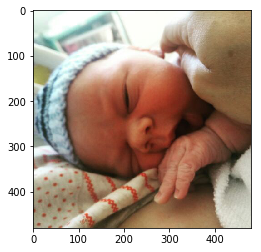

Evelyn girl 84d28e0ac7cd6d557f33ad72c5a8f6c1


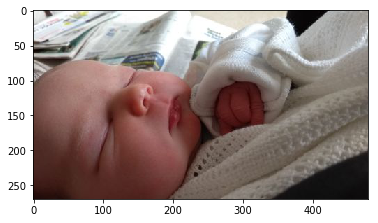

In [44]:
import base64
import io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

for baby in session.query(Baby):
    print(baby.name, baby.gender, baby.uid)
    
    i = base64.b64decode(baby.photo_base64)
    i = io.BytesIO(i)
    i = mpimg.imread(i, format='jpg')

    plt.imshow(i, interpolation='nearest')
    plt.show()

In [47]:
from sqlalchemy.sql import func

arthur_milk = session.query(func.sum(Action.volume)).filter(Action.baby_uid=='64f39806449c5572f1d629013f42a387').filter(Action.start_millis <= ARTHUR_END).filter(Action.type == 'bottle')
print(arthur_milk.one())

(101785.0,)


In [48]:
evelyn_milk = session.query(func.sum(Action.volume)).filter(Action.baby_uid=='84d28e0ac7cd6d557f33ad72c5a8f6c1').filter(Action.start_millis <= EVELYN_END).filter(Action.type == 'bottle')
print(evelyn_milk.one())

(79933.0,)


In [49]:
CONVERSION = 0.0351951

In [50]:
arthur_ozs = arthur_milk.one()[0] * CONVERSION
evelyn_ozs = evelyn_milk.one()[0] * CONVERSION

In [51]:
print(arthur_ozs)
print(evelyn_ozs)

3582.3332535
2813.2499283


In [52]:
arthur_weight = arthur_ozs * 4.5
evelyn_weight = evelyn_ozs * 4.5

In [53]:
print(arthur_weight)
print(evelyn_weight)

16120.49964075
12659.62467735


In [54]:
arthur_boxes = arthur_weight / 900
evelyn_boxes = evelyn_weight / 900
print(arthur_boxes, evelyn_boxes)

17.9116662675 14.0662496415


In [56]:
arthur_bottles = session.query(Action).filter(Action.baby_uid=='64f39806449c5572f1d629013f42a387').filter(Action.start_millis <= ARTHUR_END).filter(Action.type == 'bottle').count()
print(arthur_bottles)

694


In [58]:
evelyn_bottles = session.query(Action).filter(Action.baby_uid=='84d28e0ac7cd6d557f33ad72c5a8f6c1').filter(Action.start_millis <= EVELYN_END).filter(Action.type == 'bottle').count()
print(evelyn_bottles)

779


In [59]:
arthur_total = (694 * 6 * 4.5) / 900

In [60]:
evelyn_total = (779 * 6 * 4.5) / 900

In [61]:
print(arthur_total, evelyn_total)

20.82 23.37
